In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ins_mod=insurance[['sex','smoker','region']]
data_ins = ins_mod.apply(LabelEncoder().fit_transform)

In [6]:
insurance.drop(['sex','smoker','region'],axis=1,inplace=True)

In [7]:
insurance=pd.concat([insurance,data_ins],axis=1)
insurance.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [8]:
input_param_1='age'
input_param_2='sex'
input_param_3='children'
input_param_4='bmi'
input_param_5='smoker'
input_param_6='region'
output_param='charges'

In [9]:
x = insurance[[input_param_1,input_param_2,input_param_3,input_param_4,input_param_5,input_param_6]]
y = insurance[output_param]

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_poly,y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
lpoly = LinearRegression()
lpoly.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_prediction=lpoly.predict(x_test)
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test,y_prediction))

R2 Score: 0.8687540622442809


In [15]:
import pickle

# open a file, where you ant to store the data
file = open('PolyRegression_InsuranceKaggle_model.pkl','wb')

# dump information to that file
pickle.dump(lpoly,file)

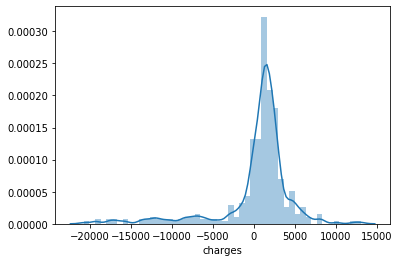

In [18]:
sns.distplot(y_prediction-y_test)